In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\IMDB-Movie-Data.csv")

In [3]:
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
data.shape

(1000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<AxesSubplot:>

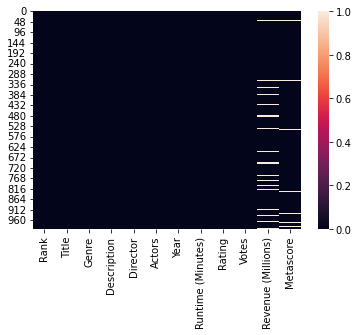

In [7]:
sns.heatmap(data.isnull())

In [8]:
per_null = data.isnull().sum() * 100 / len(data)
per_null

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [11]:
# Check duplicates
dup = data.duplicated().any()
print("are there any dulicated value in data",dup)

are there any dulicated value in data False


In [12]:
#overall statistic about Dataframe
pd.options.display.float_format = '{:0,.2f}'.format
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00,838.00,838.00,838.00,838.00,838.00,838.00
mean,485.25,"2,012.51",114.64,6.81,"193,230.25",84.56,59.58
std,286.57,3.17,18.47,0.88,"193,099.01",104.52,16.95
min,1.00,"2,006.00",66.00,1.90,178.00,0.00,11.00
25%,238.25,"2,010.00",101.00,6.30,"61,276.50",13.97,47.00
50%,475.50,"2,013.00",112.00,6.90,"136,879.50",48.15,60.00
75%,729.75,"2,015.00",124.00,7.50,"271,083.00",116.80,72.00
max,"1,000.00","2,016.00",187.00,9.00,"1,791,916.00",936.63,100.00


In [13]:
# Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [14]:
data[data['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

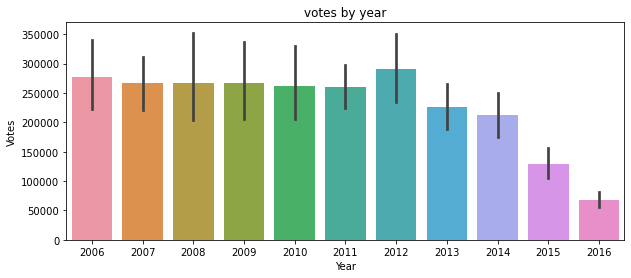

In [15]:
#In Which Year There Was The Highest Average Voting?
plt.figure(figsize=(10,4))
sns.barplot(x="Year",y="Votes",data=data)
plt.title('votes by year')
plt.show()

In [16]:
data.groupby(['Year'])['Votes'].mean().sort_values(ascending=False).head(1)

Year
2012   290,861.48
Name: Votes, dtype: float64

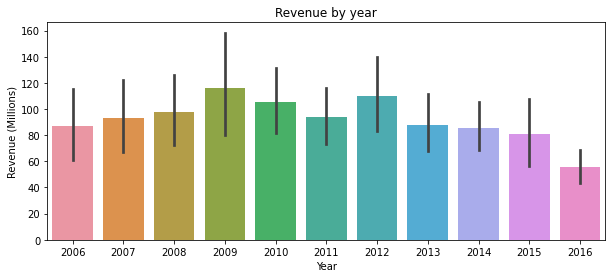

In [17]:
#In Which Year There Was The Highest Average Revenue?
plt.figure(figsize=(10,4))
sns.barplot(x="Year",y="Revenue (Millions)",data=data)
plt.title('Revenue by year')
plt.show()

In [18]:
#observation: Highest revenue in year 2009

In [19]:
#Find The Average Rating For Each Director
data.groupby(['Director'])['Rating'].mean().sort_values(ascending=False)


Director
Christopher Nolan                  8.68
Olivier Nakache                    8.60
Makoto Shinkai                     8.60
Florian Henckel von Donnersmarck   8.50
Aamir Khan                         8.50
                                   ... 
Sam Taylor-Johnson                 4.10
Joey Curtis                        4.00
George Nolfi                       3.90
James Wong                         2.70
Jason Friedberg                    1.90
Name: Rating, Length: 524, dtype: float64

In [20]:
#3. Display Top 10 Lengthy Movies Title and Run
top_10len = data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]


In [21]:
top_10len

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

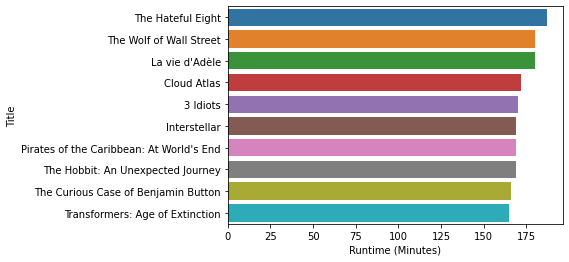

In [22]:
sns.barplot(x='Runtime (Minutes)',y='Title',data=top_10len)

In [23]:
#Display Number of Movies Per Year
data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

C:\Users\hp\anaconda3\conda-meta\set up\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


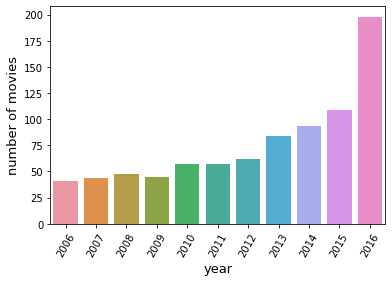

In [24]:
sns.countplot('Year',data=data)
plt.xlabel("year",fontsize=13)
plt.ylabel("number of movies",fontsize=13)
plt.xticks(rotation=60)
plt.show()

In [25]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [26]:
#Find Most Popular Movie Title (Highest Revenue)
data.nlargest(1,'Revenue (Millions)')[['Title','Revenue (Millions)']]


,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63


In [27]:
#16. Display Top 10 Highest Rated Movie Titles And its Directors
top_ratings = data.nlargest(10,'Rating')[['Title','Director','Rating']]

In [28]:
top_ratings

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.00
80,Inception,Christopher Nolan,8.80
36,Interstellar,Christopher Nolan,8.60
96,Kimi no na wa,Makoto Shinkai,8.60
249,The Intouchables,Olivier Nakache,8.60
64,The Prestige,Christopher Nolan,8.50
99,The Departed,Martin Scorsese,8.50
124,The Dark Knight Rises,Christopher Nolan,8.50
133,Whiplash,Damien Chazelle,8.50
476,The Lives of Others,Florian Henckel von Donnersmarck,8.50


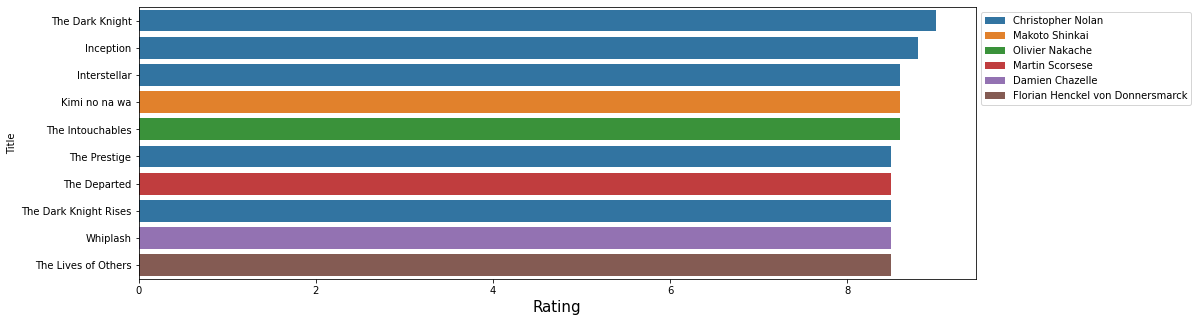

In [29]:
plt.figure(figsize=(15,5))
plt.xlabel("Title",fontsize=15)
sns.barplot(x='Rating',y='Title',data=top_ratings,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [30]:
#17. Display Top 10 Highest Revenue Movie Titles
top_revenue = data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']]


In [31]:
top_revenue

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Title'>

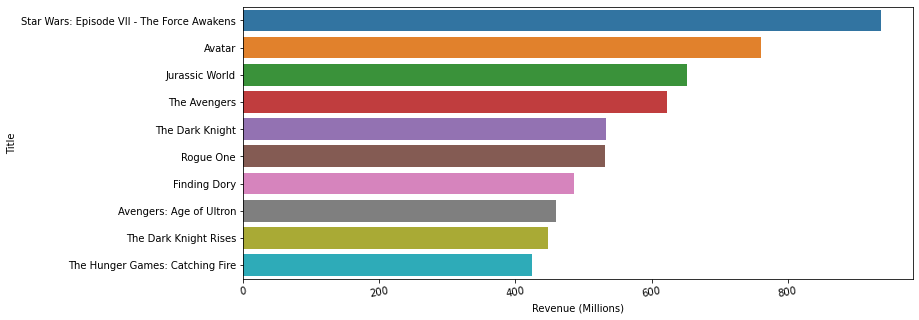

In [32]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=10)
sns.barplot(x="Revenue (Millions)",y="Title",data=top_revenue)

In [33]:
# Find Average Rating of Movies Year Wise
data.groupby('Year')['Rating'].mean()


Year
2006   7.14
2007   7.14
2008   6.71
2009   6.91
2010   6.89
2011   6.95
2012   6.93
2013   6.83
2014   6.82
2015   6.67
2016   6.64
Name: Rating, dtype: float64

In [34]:
# Does rating affect Revenue
data.nlargest(10,'Rating')[['Rating','Revenue (Millions)']]


,Rating,Revenue (Millions)
54,9.00,533.32
80,8.80,292.57
36,8.60,187.99
96,8.60,4.68
249,8.60,13.18
64,8.50,53.08
99,8.50,132.37
124,8.50,448.13
133,8.50,13.09
476,8.50,11.28


In [35]:
def rating(Rating):
    if Rating>=7.0:
        return"Excellent"
    elif Rating>=6:
        return"Good"
    else :
        return"Average"
    
          

In [36]:
data['rating_cat'] = data['Rating'].apply(rating)

In [37]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.10,757074,333.13,76.00,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.00,485820,126.46,65.00,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.30,157606,138.12,62.00,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.20,60545,270.32,59.00,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.20,393727,325.02,40.00,Good
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.10,56036,45.13,42.00,Good
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.30,258682,151.06,93.00,Excellent
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.10,7188,8.01,78.00,Excellent
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.00,192177,100.01,41.00,Excellent
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.50,232072,234.02,66.00,Excellent


In [38]:
#Count Number of Action Movie
action_movie = len(data[data['Genre'].str.contains('action',case = False)])

In [39]:
action_movie

277

In [40]:
#Find Unique Values From Genre
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [41]:
list1 = []
for value in data['Genre']:
     list1.append(value.split(','))

In [42]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [43]:
one_d = []
for item in list1:
     for item1 in item:
            one_d.append(item1)

In [44]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [45]:
uni_list = []
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [46]:
uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

In [47]:
# How Many Films of Each Genre Were Made?
from collections import Counter
Counter(one_d)


Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})